# Assigment 2: Vector vs. Lexical Semantics

#### Given a golden standard G and a large corpus of text C for English language, calculate the average Information Retrieval (IR) metric m of top-k similar words retrieved by the vector semantics based on method v.

- G: Report the evaluation results based on the golden standards SimLex-9991.
- C: Report the evaluation results based on 2 large corpus from different genres available in NLTK libraries.
- v: Report the evaluation results of methods TF-iDF3, Word2Vec4 using the cosine similarity. These methods are also called baselines.
- top-k: Report the evaluation results for top-10, i.e., k=10.
- m: Report the evaluation results based on average nDCG5 using pytrec-eval-terrier6.

In [40]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("brown")
from nltk.corpus import brown
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec, KeyedVectors
import pandas
from sklearn.metrics import ndcg_score
import numpy
from matplotlib import pyplot

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\duong\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


#### Import the SimLex-999 Golden Standard

In [2]:
simlex_999 = pandas.read_table("SimLex-999.txt")
simlex_999.head()

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93


In [3]:
len(simlex_999)

999

#### Import C as our large corpus. For this assignment, we will be using the Brown Corpus from the NLTK library.

In [29]:
corpus = brown.sents()
corpus

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

#### For the baseline method, we will be using Word2Vec method. We train the models using the C corpus with 4 different configuration. All models have an iternate number = 1000.

Train the W2V model with windows = 1 and vector = 10

In [ ]:
w2v_model_1 = Word2Vec(corpus, min_count=1, window=1, vector_size=10, epochs=1000, sg=1)

w2v_model_1 = w2v_model_1.wv
w2v_model_1.save("./Models/w2v_model_1.kv")
len(w2v_model_1)

56057

Train the W2V model with windows = 2 and vector = 50

In [ ]:
w2v_model_2 = Word2Vec(corpus, min_count=1, window=2, vector_size=50, epochs=1000)

w2v_model_2 = w2v_model_2.wv
w2v_model_2.save("./Models/w2v_model_2.kv")
len(w2v_model_2)

56057

Train the W2V model with windows = 5 and vector = 100

In [ ]:
w2v_model_5 = Word2Vec(corpus, min_count=1, window=5, vector_size=100, epochs=1000)

w2v_model_5 = w2v_model_5.wv
w2v_model_5.save("./Models/w2v_model_5.kv")
len(w2v_model_5)

56057

Train the W2V model with windows = 10 and vector = 300

In [ ]:
w2v_model_10 = Word2Vec(corpus, min_count=1, window=10, vector_size=300, epochs=1000)

w2v_model_10 = w2v_model_10.wv
w2v_model_10.save("./Models/w2v_model_10.kv")
len(w2v_model_10)

56057

In [6]:
w2v_model_1 = KeyedVectors.load('./Models/w2v_model_1.kv')
w2v_model_2 = KeyedVectors.load('./Models/w2v_model_2.kv')
w2v_model_5 = KeyedVectors.load('./Models/w2v_model_5.kv')
w2v_model_10 = KeyedVectors.load('./Models/w2v_model_10.kv')

#### Model w2v_model_1: We will be calculating the cosine similarity between pairs of word1 and word2 from the SimLex-99 Golden Standard using the w2v_model_1 model. The results will be organize to a dataframe for later usage.

In [7]:
token_corpus = pandas.DataFrame(columns=['word1', 'word2', 'cosine similarities'])

for i in simlex_999.index:
    word1 = simlex_999['word1'][i]
    word2 = simlex_999['word2'][i]
    if word1 in w2v_model_1 and word2 in w2v_model_1:
        cosine = w2v_model_1.similarity(word1, word2)
        temp = (word1, word2, cosine)
        token_corpus.loc[len(token_corpus)] = temp
            
token_corpus

,word1,word2,cosine similarities
0,old,new,0.629080
1,smart,intelligent,0.718429
2,hard,difficult,0.851986
3,happy,cheerful,0.693631
4,hard,easy,0.904421
...,...,...,...
990,join,acquire,0.721757
991,send,attend,0.794035
992,gather,attend,0.648659
993,absorb,withdraw,0.878563


Once we got all the cosine score, we then clean up our dataframe by grouping all the cosine score of the same word1. We will be doing this clean up task for both dataframes from our model and the golden standard.

In [8]:
top_k_df = token_corpus.groupby('word1', sort=False)['cosine similarities'].apply(list).to_frame()
top_k_df.reset_index(inplace=True)
top_k_df.index = numpy.arange(1, len(top_k_df)+1)
top_k_df

,word1,cosine similarities
1,old,"[0.6290796399116516, 0.6454527378082275]"
2,smart,"[0.7184290289878845, 0.6707138419151306]"
3,hard,"[0.8519864678382874, 0.9044207334518433, 0.571..."
4,happy,"[0.6936310529708862, 0.7952749133110046, 0.878..."
5,fast,[0.5642595887184143]
...,...,...
610,comprehend,[0.8037793636322021]
611,portray,"[0.6312461495399475, 0.680436372756958]"
612,organize,[0.6066852807998657]
613,enter,[0.6388939619064331]


In [9]:
temp_df = simlex_999.groupby('word1', sort=False)['SimLex999'].apply(list).to_frame()
temp_df.reset_index(inplace=True)
temp_df.index = numpy.arange(1, len(temp_df)+1)
temp_df

,word1,SimLex999
1,old,"[1.58, 0.87]"
2,smart,"[9.2, 0.55]"
3,hard,"[8.77, 0.95, 1.38, 8.05, 5.9]"
4,happy,"[9.55, 9.17, 0.95, 1.28, 2.0]"
5,fast,[8.75]
...,...,...
612,comprehend,[2.55]
613,portray,"[1.18, 0.78]"
614,organize,[1.77]
615,enter,[0.68]


Once we finished cleaning up the two dataframes, we merged them into one large dataframe for later usages.

In [10]:
top_k_df = pandas.merge(top_k_df, temp_df, on='word1')
top_k_df

,word1,cosine similarities,SimLex999
0,old,"[0.6290796399116516, 0.6454527378082275]","[1.58, 0.87]"
1,smart,"[0.7184290289878845, 0.6707138419151306]","[9.2, 0.55]"
2,hard,"[0.8519864678382874, 0.9044207334518433, 0.571...","[8.77, 0.95, 1.38, 8.05, 5.9]"
3,happy,"[0.6936310529708862, 0.7952749133110046, 0.878...","[9.55, 9.17, 0.95, 1.28, 2.0]"
4,fast,[0.5642595887184143],[8.75]
...,...,...,...
609,comprehend,[0.8037793636322021],[2.55]
610,portray,"[0.6312461495399475, 0.680436372756958]","[1.18, 0.78]"
611,organize,[0.6066852807998657],[1.77]
612,enter,[0.6388939619064331],[0.68]


#### Next, we calculate the nDCG Score between our cosine score and the SimLex999's cosine score.

In [11]:
top_k_df['nDCG Score'] = ""

for i in top_k_df.index:
    c = [top_k_df['cosine similarities'][i]]
    g = [top_k_df['SimLex999'][i]]
    
    if len(top_k_df['cosine similarities'][i]) > 1:
        if len(top_k_df['cosine similarities'][i]) == len(top_k_df['SimLex999'][i]):
            score = ndcg_score(g, c)
            top_k_df['nDCG Score'][i] = score

top_k_df

,word1,cosine similarities,SimLex999,nDCG Score
0,old,"[0.6290796399116516, 0.6454527378082275]","[1.58, 0.87]",0.876914
1,smart,"[0.7184290289878845, 0.6707138419151306]","[9.2, 0.55]",1.0
2,hard,"[0.8519864678382874, 0.9044207334518433, 0.571...","[8.77, 0.95, 1.38, 8.05, 5.9]",0.756387
3,happy,"[0.6936310529708862, 0.7952749133110046, 0.878...","[9.55, 9.17, 0.95, 1.28, 2.0]",0.710676
4,fast,[0.5642595887184143],[8.75],
...,...,...,...,...
609,comprehend,[0.8037793636322021],[2.55],
610,portray,"[0.6312461495399475, 0.680436372756958]","[1.18, 0.78]",0.911712
611,organize,[0.6066852807998657],[1.77],
612,enter,[0.6388939619064331],[0.68],


In [12]:
top_k_df['nDCG Score'].replace('', numpy.nan, inplace=True)
top_k_df.dropna(subset=['nDCG Score'], inplace = True)
top_k_df.set_index('word1', inplace=True)
top_k_df

,cosine similarities,SimLex999,nDCG Score
word1,,,
old,"[0.6290796399116516, 0.6454527378082275]","[1.58, 0.87]",0.876914
smart,"[0.7184290289878845, 0.6707138419151306]","[9.2, 0.55]",1.000000
hard,"[0.8519864678382874, 0.9044207334518433, 0.571...","[8.77, 0.95, 1.38, 8.05, 5.9]",0.756387
happy,"[0.6936310529708862, 0.7952749133110046, 0.878...","[9.55, 9.17, 0.95, 1.28, 2.0]",0.710676
weird,"[0.8729371428489685, 0.5218431949615479, 0.807...","[8.93, 0.72, 9.2]",0.993442
...,...,...,...
become,"[0.8592092394828796, 0.7956582307815552]","[2.63, 4.77]",0.877155
bring,"[0.9721508026123047, 0.8548376560211182, 0.761...","[2.97, 2.62, 0.98]",1.000000
absorb,"[0.7821173667907715, 0.6810975074768066, 0.878...","[5.48, 5.0, 2.97]",0.882194


#### We then plot the nDCG score for the respective model.

Text(0, 0.5, 'nDCG Score')

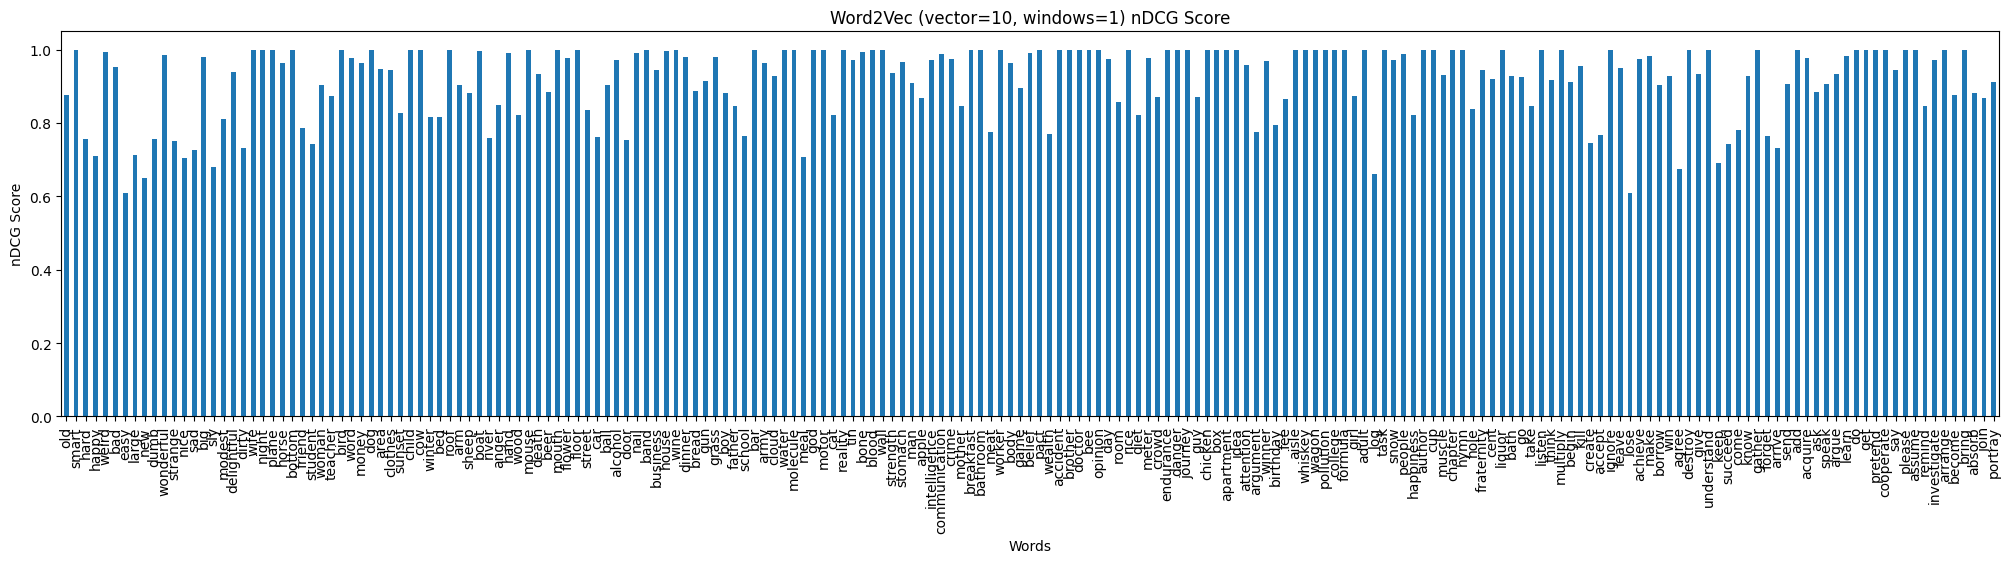

In [13]:
top_k_df['nDCG Score'].plot(kind='bar', figsize=(25,5))
pyplot.title("Word2Vec (vector=10, windows=1) nDCG Score")
pyplot.xlabel('Words')
pyplot.ylabel('nDCG Score')

#### We repeated the above steps to calculate the cosine and nDCG score on the other 3 Word2Vex models we trained earlier.

Text(0, 0.5, 'nDCG Score')

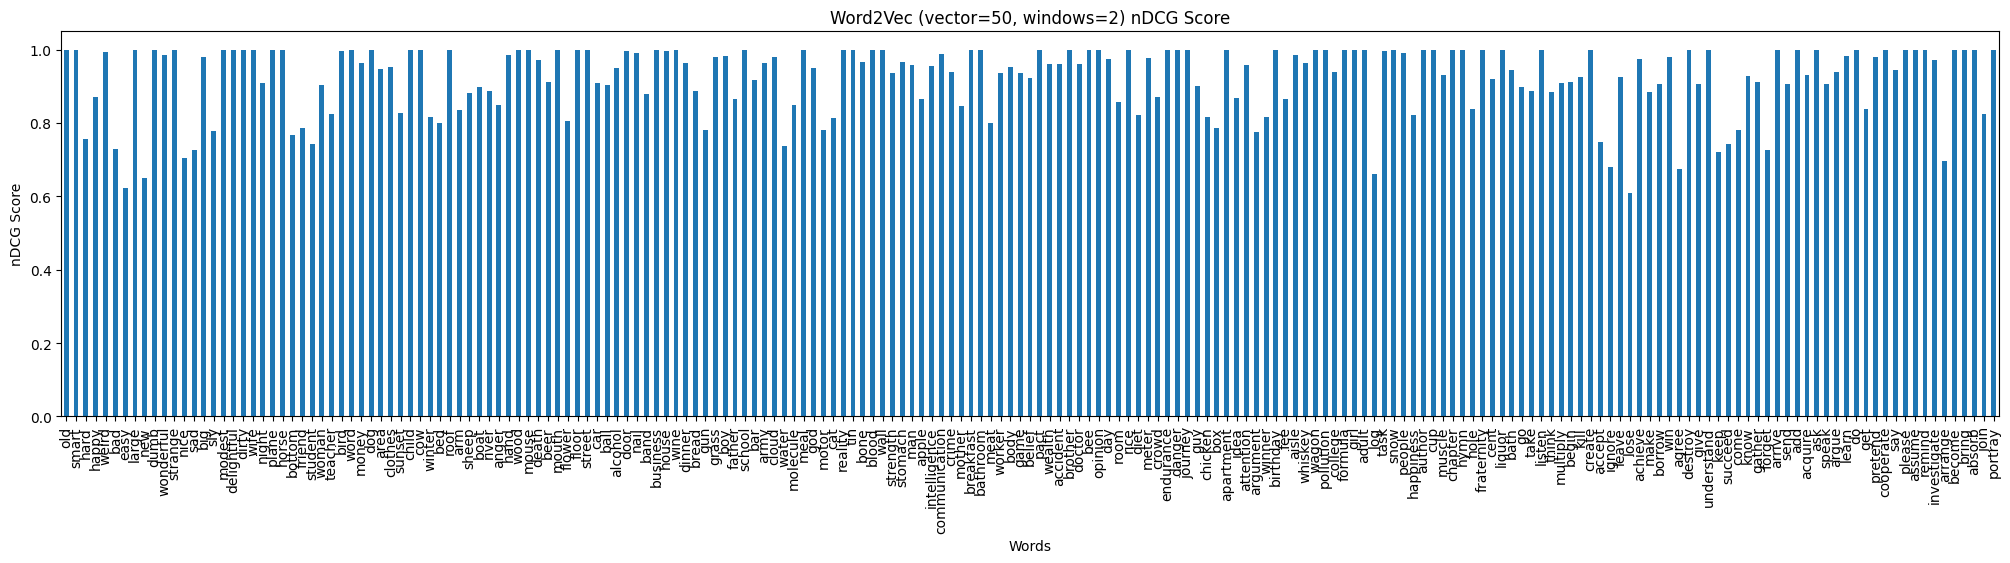

In [14]:
token_corpus_2 = pandas.DataFrame(columns=['word1', 'word2', 'cosine similarities'])

for i in simlex_999.index:
    word1 = simlex_999['word1'][i]
    word2 = simlex_999['word2'][i]
    if word1 in w2v_model_2 and word2 in w2v_model_2:
        cosine = w2v_model_2.similarity(word1, word2)
        temp = (word1, word2, cosine)
        token_corpus_2.loc[len(token_corpus_2)] = temp
            
top_k_df_2 = token_corpus_2.groupby('word1', sort=False)['cosine similarities'].apply(list).to_frame()
top_k_df_2.reset_index(inplace=True)
top_k_df_2.index = numpy.arange(1, len(top_k_df_2)+1)

temp_df_2 = simlex_999.groupby('word1', sort=False)['SimLex999'].apply(list).to_frame()
temp_df_2.reset_index(inplace=True)
temp_df_2.index = numpy.arange(1, len(temp_df_2)+1)

top_k_df_2 = pandas.merge(top_k_df_2, temp_df_2, on='word1')

top_k_df_2['nDCG Score'] = ""

for i in top_k_df_2.index:
    c = [top_k_df_2['cosine similarities'][i]]
    g = [top_k_df_2['SimLex999'][i]]
    
    if len(top_k_df_2['cosine similarities'][i]) > 1:
        if len(top_k_df_2['cosine similarities'][i]) == len(top_k_df_2['SimLex999'][i]):
            score = ndcg_score(g, c)
            top_k_df_2['nDCG Score'][i] = score

top_k_df_2['nDCG Score'].replace('', numpy.nan, inplace=True)
top_k_df_2.dropna(subset=['nDCG Score'], inplace = True)
top_k_df_2.set_index('word1', inplace=True)

top_k_df_2['nDCG Score'].plot(kind='bar', figsize=(25,5))
pyplot.title("Word2Vec (vector=50, windows=2) nDCG Score")
pyplot.xlabel('Words')
pyplot.ylabel('nDCG Score')

Text(0, 0.5, 'nDCG Score')

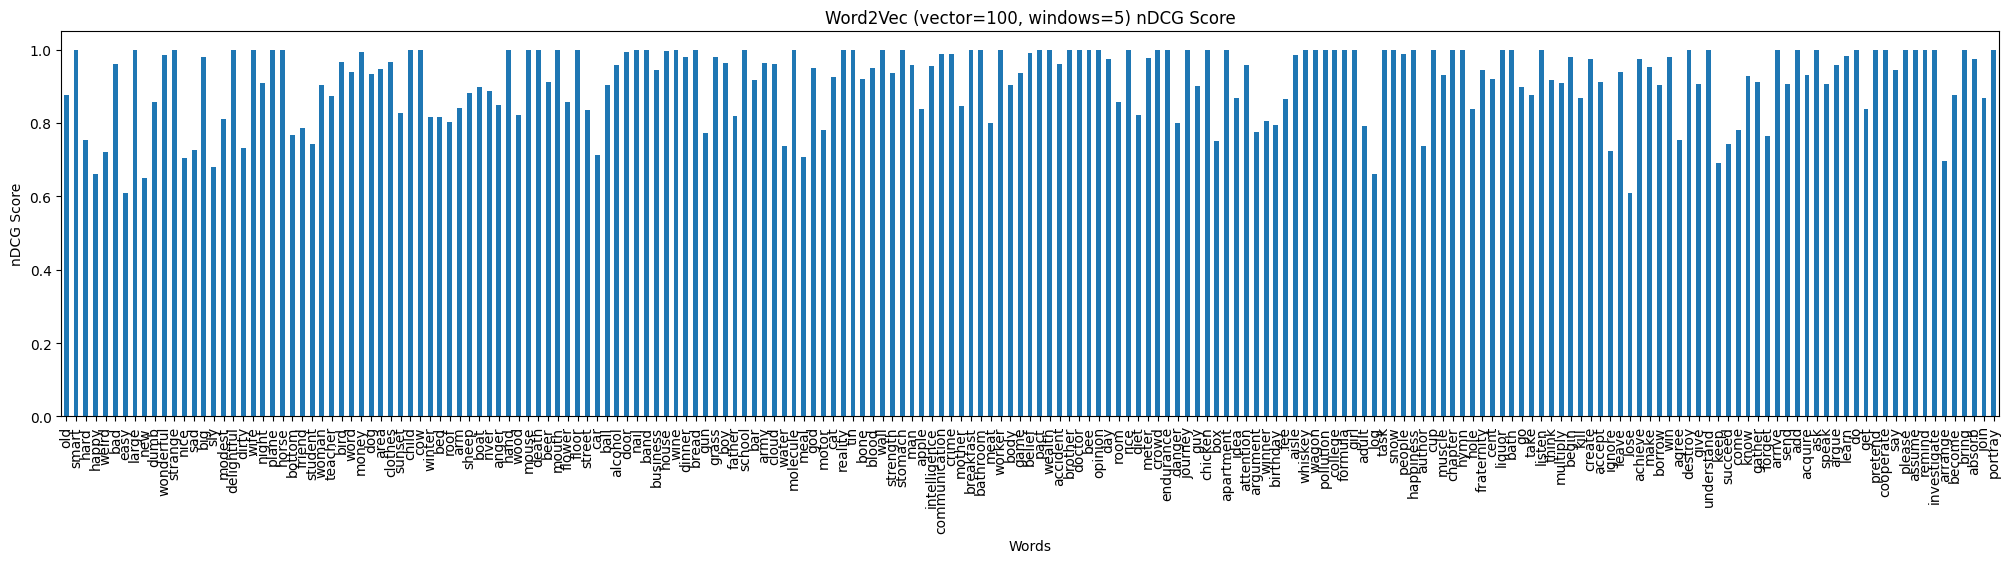

In [15]:
token_corpus_5 = pandas.DataFrame(columns=['word1', 'word2', 'cosine similarities'])

for i in simlex_999.index:
    word1 = simlex_999['word1'][i]
    word2 = simlex_999['word2'][i]
    if word1 in w2v_model_5 and word2 in w2v_model_5:
        cosine = w2v_model_5.similarity(word1, word2)
        temp = (word1, word2, cosine)
        token_corpus_5.loc[len(token_corpus_5)] = temp
            
top_k_df_5 = token_corpus_5.groupby('word1', sort=False)['cosine similarities'].apply(list).to_frame()
top_k_df_5.reset_index(inplace=True)
top_k_df_5.index = numpy.arange(1, len(top_k_df_5)+1)

temp_df_5 = simlex_999.groupby('word1', sort=False)['SimLex999'].apply(list).to_frame()
temp_df_5.reset_index(inplace=True)
temp_df_5.index = numpy.arange(1, len(temp_df_5)+1)

top_k_df_5 = pandas.merge(top_k_df_5, temp_df_5, on='word1')

top_k_df_5['nDCG Score'] = ""

for i in top_k_df_5.index:
    c = [top_k_df_5['cosine similarities'][i]]
    g = [top_k_df_5['SimLex999'][i]]
    
    if len(top_k_df_5['cosine similarities'][i]) > 1:
        if len(top_k_df_5['cosine similarities'][i]) == len(top_k_df_5['SimLex999'][i]):
            score = ndcg_score(g, c)
            top_k_df_5['nDCG Score'][i] = score

top_k_df_5['nDCG Score'].replace('', numpy.nan, inplace=True)
top_k_df_5.dropna(subset=['nDCG Score'], inplace = True)
top_k_df_5.set_index('word1', inplace=True)

top_k_df_5['nDCG Score'].plot(kind='bar', figsize=(25,5))
pyplot.title("Word2Vec (vector=100, windows=5) nDCG Score")
pyplot.xlabel('Words')
pyplot.ylabel('nDCG Score')

Text(0, 0.5, 'nDCG Score')

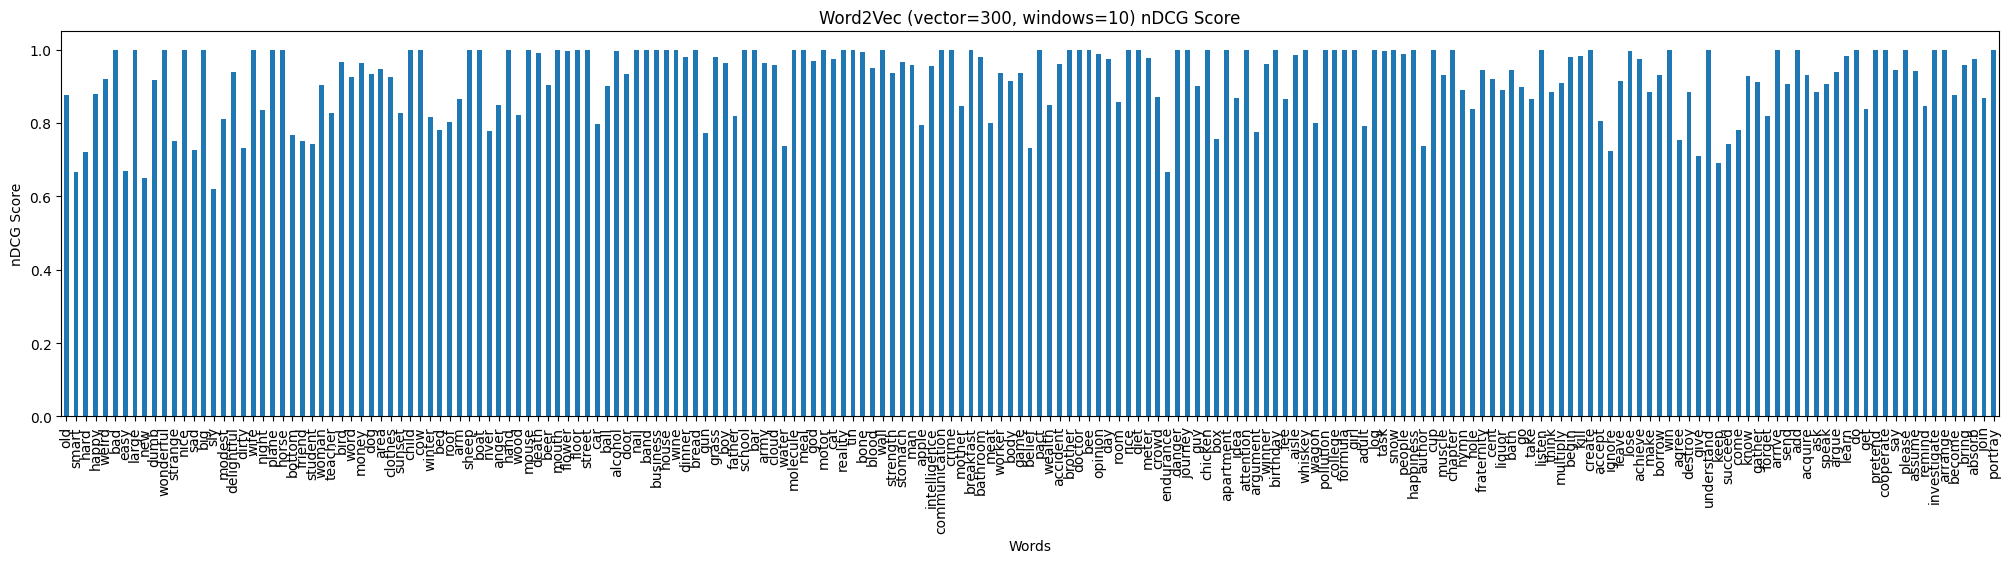

In [16]:
token_corpus_10 = pandas.DataFrame(columns=['word1', 'word2', 'cosine similarities'])

for i in simlex_999.index:
    word1 = simlex_999['word1'][i]
    word2 = simlex_999['word2'][i]
    if word1 in w2v_model_10 and word2 in w2v_model_10:
        cosine = w2v_model_10.similarity(word1, word2)
        temp = (word1, word2, cosine)
        token_corpus_10.loc[len(token_corpus_10)] = temp
            
top_k_df_10 = token_corpus_10.groupby('word1', sort=False)['cosine similarities'].apply(list).to_frame()
top_k_df_10.reset_index(inplace=True)
top_k_df_10.index = numpy.arange(1, len(top_k_df_10)+1)

temp_df_10 = simlex_999.groupby('word1', sort=False)['SimLex999'].apply(list).to_frame()
temp_df_10.reset_index(inplace=True)
temp_df_10.index = numpy.arange(1, len(temp_df_10)+1)

top_k_df_10 = pandas.merge(top_k_df_10, temp_df_10, on='word1')

top_k_df_10['nDCG Score'] = ""

for i in top_k_df_10.index:
    c = [top_k_df_10['cosine similarities'][i]]
    g = [top_k_df_10['SimLex999'][i]]
    
    if len(top_k_df_10['cosine similarities'][i]) > 1:
        if len(top_k_df_10['cosine similarities'][i]) == len(top_k_df_10['SimLex999'][i]):
            score = ndcg_score(g, c)
            top_k_df_10['nDCG Score'][i] = score

top_k_df_10['nDCG Score'].replace('', numpy.nan, inplace=True)
top_k_df_10.dropna(subset=['nDCG Score'], inplace = True)
top_k_df_10.set_index('word1', inplace=True)

top_k_df_10['nDCG Score'].plot(kind='bar', figsize=(25,5))
pyplot.title("Word2Vec (vector=300, windows=10) nDCG Score")
pyplot.xlabel('Words')
pyplot.ylabel('nDCG Score')

#### Lastly, we calculate and plot the adverage nDCG score obtained from all 4 Word2Vec models

Text(0, 0.5, 'nDCG Score')

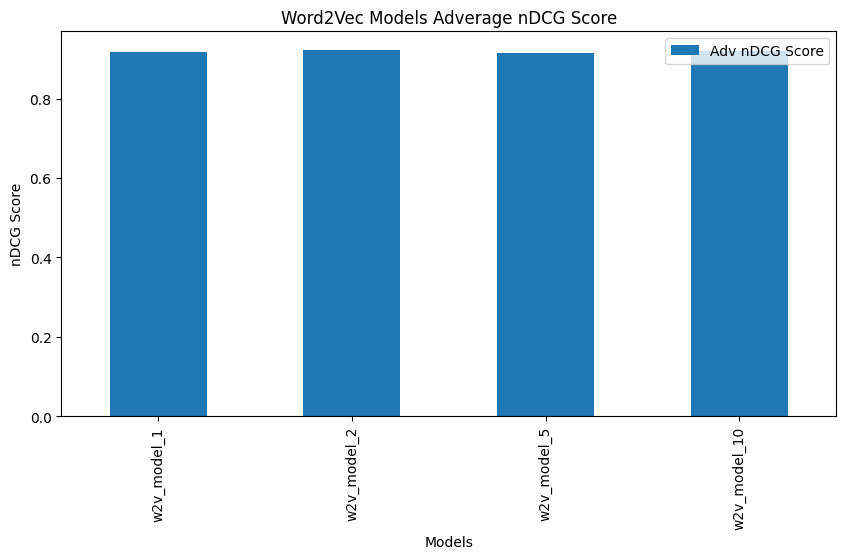

In [24]:
ndcg_adverage_1 = top_k_df['nDCG Score'].mean(axis=0)
ndcg_adverage_2 = top_k_df_2['nDCG Score'].mean(axis=0)
ndcg_adverage_5 = top_k_df_5['nDCG Score'].mean(axis=0)
ndcg_adverage_10 = top_k_df_10['nDCG Score'].mean(axis=0)

data = {'Models': ['w2v_model_1', 'w2v_model_2', 'w2v_model_5', 'w2v_model_10'],
        'Adv nDCG Score': [ndcg_adverage_1, ndcg_adverage_2, ndcg_adverage_5, ndcg_adverage_10]}

ndcg_adverage = pandas.DataFrame(data)
ndcg_adverage.set_index('Models', inplace=True)
ndcg_adverage.plot(kind='bar', figsize=(10,5))
pyplot.title("Word2Vec Models Adverage nDCG Score")
pyplot.xlabel('Models')
pyplot.ylabel('nDCG Score')